In [363]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [364]:
region_num=12
region_names=['Hildesheim','Holzminden','Goslar','Höxter','Northeim','Göttingen','Harz','Kassel (LK)','Kassel (SK)','Werra-Meißner-Kreis','Eichsfeld','Nordhausen']
labels={}
for intern_region_number in range(region_num):
    labels[intern_region_number]=region_names[intern_region_number]
region_popsize=np.array([275817,  70458, 136292, 140251, 132285, 326041, 213310,
       236764, 202137, 100629, 100006,  83416])

In [365]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

Import commuter data from www.pendleratlas.de (no database available, written by hand). Note: Commuters from and to non-neighboring districts are not included!

In [366]:
g11_adjacence=np.array([   [0, 1705+805, 802+1316, 0, 1046+863, 0, 0, 0, 0, 0, 0, 0],
                           [1705+805, 0, 0, 3646+2623, 994+1305, 0, 0, 0, 0, 0, 0, 0],
                           [802+1316, 0, 0, 0, 857+809, 1659+1955, 3677+1042, 0, 0, 0, 0, 99+0],
                           [0, 3646+2623, 0, 0, 0, 0, 0, 1313+1116, 0, 0, 0, 0],
                           [1046+863, 994+1305, 857+809, 0, 0, 11166+5710, 0, 611+518, 0, 0, 0, 0],
                           [0, 0, 1659+1955, 0, 11166+5710, 0, 0, 2637+1920, 1633+3551, 2146+710, 7160+1288, 1658+809],
                           [0, 0, 3677+1042, 0, 0, 0, 0, 0, 0, 0, 0, 194+182],
                           [0, 0, 0, 1313+1116, 611+518, 2637+1920, 0, 0, 35268+13753, 912+1950, 0, 0],
                           [0, 0, 0, 0, 0, 1633+3551, 0, 35268+13753, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 2146+710, 0, 912+1950, 0, 0, 1486+548, 0],
                           [0, 0, 0, 0, 0, 7160+1288, 0, 0, 0, 1486+548, 0, 984+1755],
                           [0, 0, 99+0, 0, 0, 1658+809, 194+182, 0, 0, 0, 984+1755, 0]])

In [367]:
def re_weight(matrix):
    output=matrix.copy()
    dim=len(output[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] > 0: 
                output[i][j]=1
    return output

def create_unweighted_network(matrix):
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] > 0: 
                G.add_edge(i,j)
    
    distinct_pos = {0:(0,10),1:(0,7),2:(7,10),3:(0,3.2),4:(3,7),5:(7,6),6:(11,11),7:(3,2),8:(5.8,3.2),9:(7,0),10:(11,2),11:(11,7)}
    plt.figure(figsize=(10,8),dpi=150)
    nx.draw_networkx(G,distinct_pos, labels=labels,node_size=4500, with_labels=True, font_color='black', width=3, node_color='lightgrey' ,edge_color='grey',cmap=plt.cm.YlOrRd,vmin=0, vmax=0.07,arrowsize=1e-10)
    plt.savefig('Results/G12_unweighted_Network.png')
    plt.show()
    print("Clustering Coefficient:",nx.average_clustering(G))
    print("Density:",nx.density(G))


def create_network(matrix):
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] > 0: 
                G.add_edge(i,j, weight=matrix[i][j])
    weights = [np.sqrt(G[u][v]['weight']/200) for u,v in G.edges]
    distinct_pos = {0:(0,10),1:(0,7),2:(7,10),3:(0,3.2),4:(3,7),5:(7,6),6:(11,11),7:(3,2),8:(5.8,3.2),9:(7,0),10:(11,2),11:(11,7)}
    plt.figure(figsize=(10,8),dpi=150)
    nx.draw_networkx(G,distinct_pos, labels=labels,node_size=4500, with_labels=True, font_color='black', width=weights, node_color='lightgrey' ,edge_color='grey',cmap=plt.cm.YlOrRd,vmin=0, vmax=0.07,arrowsize=1e-10)
    plt.savefig('Results/G12_weighted_Network.png')
    plt.show()
    print("Clustering Coefficient:",nx.average_clustering(G))
    print("Density:",nx.density(G))
    


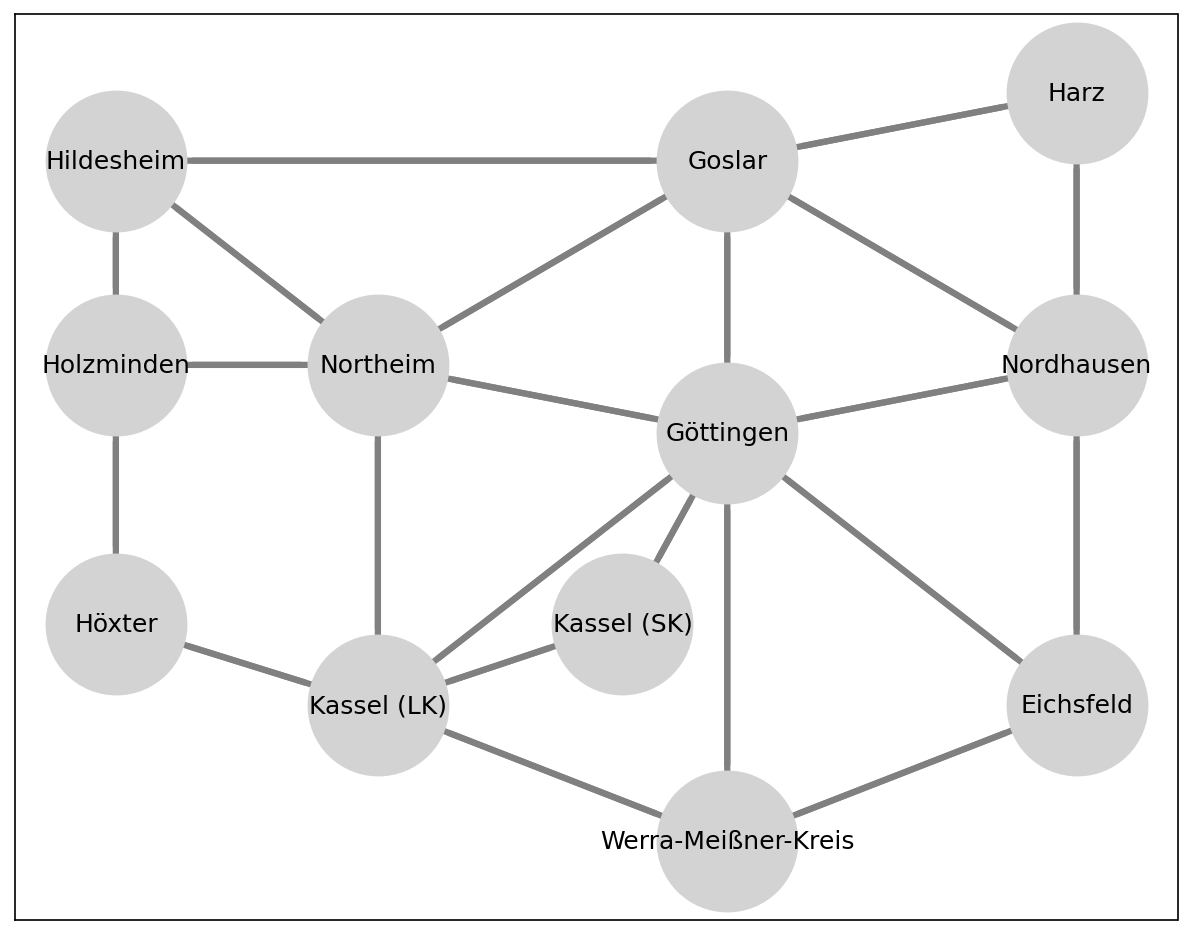

Clustering Coefficient: 0.5222222222222223
Density: 0.3333333333333333


In [368]:
create_unweighted_network(g11_adjacence)

In [369]:
print (bmatrix(g11_adjacence) + '\n')

\begin{bmatrix}
  0 & 2510 & 2118 & 0 & 1909 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  2510 & 0 & 0 & 6269 & 2299 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  2118 & 0 & 0 & 0 & 1666 & 3614 & 4719 & 0 & 0 & 0 & 0 & 99\\
  0 & 6269 & 0 & 0 & 0 & 0 & 0 & 2429 & 0 & 0 & 0 & 0\\
  1909 & 2299 & 1666 & 0 & 0 & 16876 & 0 & 1129 & 0 & 0 & 0 & 0\\
  0 & 0 & 3614 & 0 & 16876 & 0 & 0 & 4557 & 5184 & 2856 & 8448 & 2467\\
  0 & 0 & 4719 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 376\\
  0 & 0 & 0 & 2429 & 1129 & 4557 & 0 & 0 & 49021 & 2862 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 5184 & 0 & 49021 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 2856 & 0 & 2862 & 0 & 0 & 2034 & 0\\
  0 & 0 & 0 & 0 & 0 & 8448 & 0 & 0 & 0 & 2034 & 0 & 2739\\
  0 & 0 & 99 & 0 & 0 & 2467 & 376 & 0 & 0 & 0 & 2739 & 0\\
\end{bmatrix}



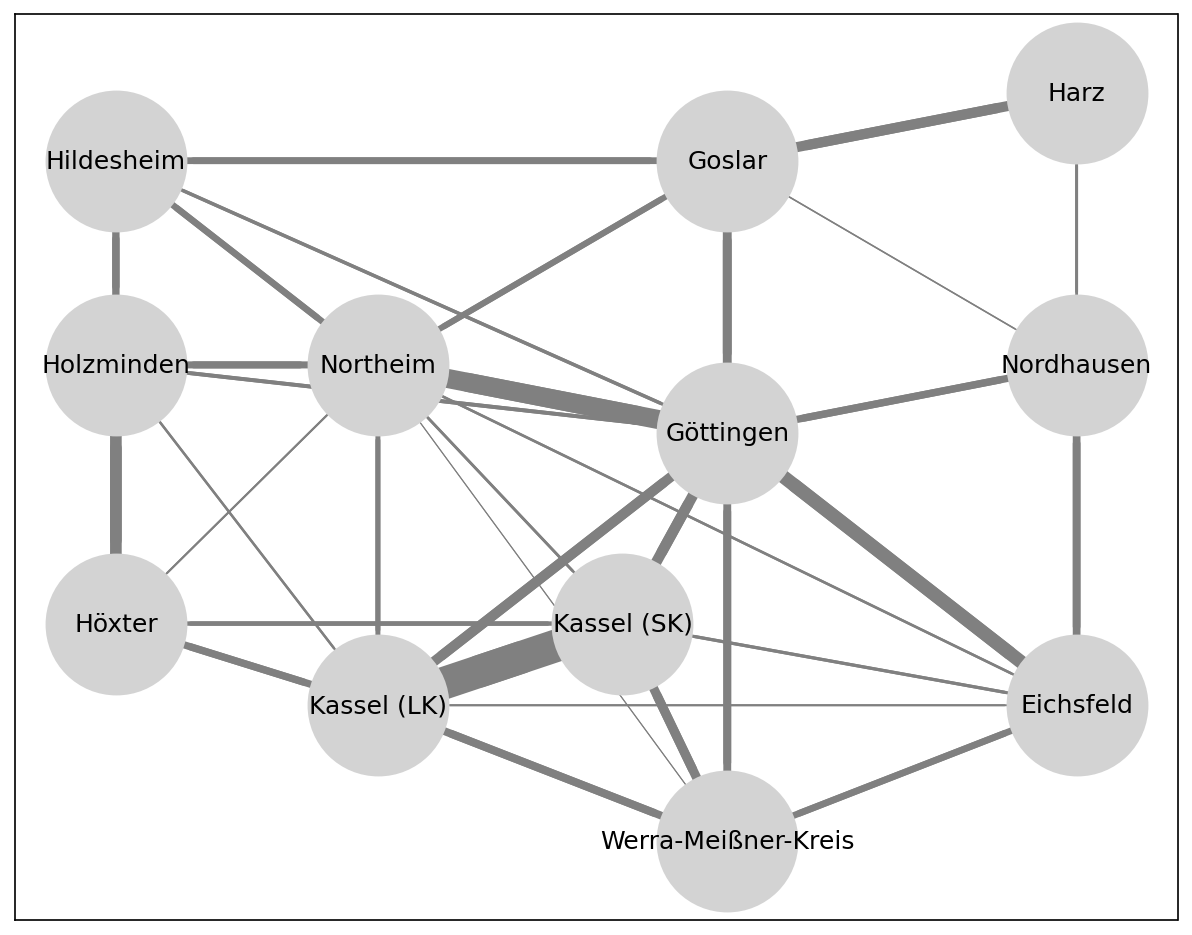

Clustering Coefficient: 0.7201719576719575
Density: 0.5


In [370]:
g11_complete_commute=np.array([ [0, 1705+805, 802+1316, 0, 1046+863, 538+0, 0, 0, 0, 0, 0, 0],
                                [1705+805, 0, 0, 3646+2623, 994+1305, 113+577, 0, 160+99, 0, 0, 0, 0],
                                [802+1316, 0, 0, 0, 857+809, 1659+1955, 3677+1042, 0, 0, 0, 0, 99+0],
                                [0, 3646+2623, 0, 0, 181+0, 0, 0, 1313+1116, 211+696, 0, 0, 0],
                                [1046+863, 994+1305, 857+809, 181+0, 0, 11166+5710, 0, 611+518, 327, 53+0, 298+0, 0],
                                [538+0, 113+577, 1659+1955, 0, 11166+5710, 0, 0, 2637+1920, 1633+3551, 2146+710, 7160+1288, 1658+809],
                                [0, 0, 3677+1042, 0, 0, 0, 0, 0, 0, 0, 0, 194+182],
                                [0, 160+99, 0, 1313+1116, 611+518, 2637+1920, 0, 0, 35268+13753, 912+1950, 176+0, 0],
                                [0, 0, 0, 211+696, 327, 1633+3551, 0, 35268+13753, 0, 3429+458, 457+0, 0],
                                [0, 0, 0, 0, 53+0, 2146+710, 0, 912+1950, 3429+458, 0, 1486+548, 0],
                                [0, 0, 0, 0, 298, 7160+1288, 0, 176+0, 457+0, 1486+548, 0, 984+1755],
                                [0, 0, 99+0, 0, 0, 1658+809, 194+182, 0, 0, 0, 984+1755, 0]])


create_network(g11_complete_commute)

In [371]:
def mod_laplacian(matrix):
    dim=len(matrix[0])
    output=matrix.copy()
    for i in range(dim):
        sum=0
        for j in range(dim):
            sum+=matrix[i][j]
        output[i][i]=sum
    return output

In [372]:
print (bmatrix(g11_complete_commute) + '\n')

\begin{bmatrix}
  0 & 2510 & 2118 & 0 & 1909 & 538 & 0 & 0 & 0 & 0 & 0 & 0\\
  2510 & 0 & 0 & 6269 & 2299 & 690 & 0 & 259 & 0 & 0 & 0 & 0\\
  2118 & 0 & 0 & 0 & 1666 & 3614 & 4719 & 0 & 0 & 0 & 0 & 99\\
  0 & 6269 & 0 & 0 & 181 & 0 & 0 & 2429 & 907 & 0 & 0 & 0\\
  1909 & 2299 & 1666 & 181 & 0 & 16876 & 0 & 1129 & 327 & 53 & 298 & 0\\
  538 & 690 & 3614 & 0 & 16876 & 0 & 0 & 4557 & 5184 & 2856 & 8448 & 2467\\
  0 & 0 & 4719 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 376\\
  0 & 259 & 0 & 2429 & 1129 & 4557 & 0 & 0 & 49021 & 2862 & 176 & 0\\
  0 & 0 & 0 & 907 & 327 & 5184 & 0 & 49021 & 0 & 3887 & 457 & 0\\
  0 & 0 & 0 & 0 & 53 & 2856 & 0 & 2862 & 3887 & 0 & 2034 & 0\\
  0 & 0 & 0 & 0 & 298 & 8448 & 0 & 176 & 457 & 2034 & 0 & 2739\\
  0 & 0 & 99 & 0 & 0 & 2467 & 376 & 0 & 0 & 0 & 2739 & 0\\
\end{bmatrix}



In [373]:
print(bmatrix(re_weight(g11_adjacence)) + '\n')

\begin{bmatrix}
  0 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 1\\
  0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
  1 & 1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
  0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & 1\\
  0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
  0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1\\
  0 & 0 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix}



In [374]:
laplace_G=mod_laplacian(re_weight(g11_adjacence))
print(bmatrix(laplace_G) + '\n')

\begin{bmatrix}
  3 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  1 & 3 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  1 & 0 & 5 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 1\\
  0 & 1 & 0 & 2 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
  1 & 1 & 1 & 0 & 5 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
  0 & 0 & 1 & 0 & 1 & 7 & 0 & 1 & 1 & 1 & 1 & 1\\
  0 & 0 & 1 & 0 & 0 & 0 & 2 & 0 & 0 & 0 & 0 & 1\\
  0 & 0 & 0 & 1 & 1 & 1 & 0 & 5 & 1 & 1 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 2 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 3 & 1 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 3 & 1\\
  0 & 0 & 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 4\\
\end{bmatrix}



In [375]:
laplace_M=mod_laplacian(g11_complete_commute)
print (bmatrix(laplace_M) + '\n')

\begin{bmatrix}
  7075 & 2510 & 2118 & 0 & 1909 & 538 & 0 & 0 & 0 & 0 & 0 & 0\\
  2510 & 12027 & 0 & 6269 & 2299 & 690 & 0 & 259 & 0 & 0 & 0 & 0\\
  2118 & 0 & 12216 & 0 & 1666 & 3614 & 4719 & 0 & 0 & 0 & 0 & 99\\
  0 & 6269 & 0 & 9786 & 181 & 0 & 0 & 2429 & 907 & 0 & 0 & 0\\
  1909 & 2299 & 1666 & 181 & 24738 & 16876 & 0 & 1129 & 327 & 53 & 298 & 0\\
  538 & 690 & 3614 & 0 & 16876 & 45230 & 0 & 4557 & 5184 & 2856 & 8448 & 2467\\
  0 & 0 & 4719 & 0 & 0 & 0 & 5095 & 0 & 0 & 0 & 0 & 376\\
  0 & 259 & 0 & 2429 & 1129 & 4557 & 0 & 60433 & 49021 & 2862 & 176 & 0\\
  0 & 0 & 0 & 907 & 327 & 5184 & 0 & 49021 & 59783 & 3887 & 457 & 0\\
  0 & 0 & 0 & 0 & 53 & 2856 & 0 & 2862 & 3887 & 11692 & 2034 & 0\\
  0 & 0 & 0 & 0 & 298 & 8448 & 0 & 176 & 457 & 2034 & 14152 & 2739\\
  0 & 0 & 99 & 0 & 0 & 2467 & 376 & 0 & 0 & 0 & 2739 & 5681\\
\end{bmatrix}



In [376]:
def create_omega(LG,g,LM,m):
    "calculates omega matrix for given modified laplacians LG and LM with weights g and m"
    dim=len(LG[0])
    output=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            if(i!=j):
                output[i][j]=round((g*LG[i][j]/LG[i][i]+m*LM[i][j]/LM[i][i])/(g+m),4)
    return output
        

omega=create_omega(laplace_G,1,laplace_M,2)

print (bmatrix(omega) + '\n')

\begin{bmatrix}
  0. & 0.3476 & 0.3107 & 0. & 0.291 & 0.0507 & 0. & 0. & 0. & 0.\\
  0. & 0.\\
  0.2502 & 0. & 0. & 0.4586 & 0.2385 & 0.0382 & 0. & 0.0144 & 0. & 0.\\
  0. & 0.\\
  0.1823 & 0. & 0. & 0. & 0.1576 & 0.2639 & 0.3242 & 0. & 0. & 0.\\
  0. & 0.0721\\
  0. & 0.5937 & 0. & 0. & 0.0123 & 0. & 0. & 0.3321 & 0.0618 & 0.\\
  0. & 0.\\
  0.1181 & 0.1286 & 0.1116 & 0.0049 & 0. & 0.5215 & 0. & 0.0971 & 0.0088 & 0.0014\\
  0.008 & 0.\\
  0.0079 & 0.0102 & 0.1009 & 0. & 0.2964 & 0. & 0. & 0.1148 & 0.124 & 0.0897\\
  0.1721 & 0.084\\
  0. & 0. & 0.7841 & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0.2159\\
  0. & 0.0029 & 0. & 0.0935 & 0.0791 & 0.1169 & 0. & 0. & 0.6074 & 0.0982\\
  0.0019 & 0.\\
  0. & 0. & 0. & 0.0101 & 0.0036 & 0.2245 & 0. & 0.7133 & 0. & 0.0433\\
  0.0051 & 0.\\
  0. & 0. & 0. & 0. & 0.003 & 0.274 & 0. & 0.2743 & 0.2216 & 0.\\
  0.2271 & 0.\\
  0. & 0. & 0. & 0. & 0.014 & 0.5091 & 0. & 0.0083 & 0.0215 & 0.2069\\
  0. & 0.2401\\
  0. & 0. & 0.095 & 0. & 0. & 0.3728 & 